#### ***Reference: Pradhan, Manaranjan; U Dinesh Kumar. Machine Learning using Python. Kindle Edition.*** 

# **Forecasting**

**Forecasting Overview**<br>
Forecasting is by far the most important and frequently used application of predictive analytics because  it has significant impact on both the top line and the bottom line of an organization. Every organization  prepares long-range and short-range planning and forecasting demand for product and service is an  important input for both long-range and short-range planning. Different capacity planning problems  such as manpower planning, machine capacity, warehouse capacity, materials requirements planning  (MRP) will depend on the forecasted demand for the product/service. Budget allocation for marketing  promotions and advertisements are usually made based on forecasted demand for the product.<br> Following are few examples of challenging forecasting problems:  
   1. Demand for products and service is not the only application of forecasting, even manpower  planning requires the use of sophisticated models. Indian information technology (IT) companies struggle to manage the right level of manpower for each skill required to manage their business. This would involve forecasting business opportunities, skills required to manage current  and future projects, and so on.
   
   2. Boeing 747-400 has more than 6 million parts and several thousand unique parts (Hill, 2011).  Forecasting demand for spare parts is important since non-availability of mission-critical parts  can result in aircraft on ground (AOG) which can be very expensive for airlines.
   
   3. Walmart sells more than 142,000 products through their supercenters (source: Walmart website; see Reference section). Being a brick-and-mortar retail store, Walmart does not have the advantages of Amazon.com (being also a market place, Amazon does not have to predict demand  for all the products sold through their portal). Walmart must maintain stock for each and every  product sold and predict demand for the products as accurately as possible.

## **Components of TIME-SERIES DATA**
- The time-series data $Y_t$ is a random variable, usually collected at regular time intervals and in chronological order. 

- If the time-series data contains observations of just a single variable (such as demand of a product at time t), then it is termed as ***<u>univariate time-series data</u>***. 

- If the data consists of more than one variable, for example, demand for a product at time t, price at time t, amount of money spent by the company on promotion at time t, competitors’ price at time t, etc., then it is called ***<u>multivariate timeseries data</u>***.  

- *A time-series data can be broken into the 4 following components:*  
    1. **<u>Trend Component</u> ($T_t$):** ***Trend is the consistent long-term upward or downward movement of the data.***<br><br>
    
    2. **<u>Seasonal Component</u> ($S_t$):** ***Changes in trend-line due any occassion, every calender-year.***<br><br>Seasonal component (measured using seasonality index) is the  repetitive upward or downward movement (or fluctuations) from the trend that occurs within  a calendar year at fixed intervals (i.e., time between seasons is fixed) such as seasons, quarters, months, days of the week, etc. The upward or downward fluctuation may be caused due to festivals, customs within a society, school holidays, business practices within the market such as “end of season sale”, and so on.<br><br>
    
    3. **<u>Cyclical Component</u> ($C_t$):** ***Random Changes in trend-line due to any macro-economic changes.***<br><br> Cyclical component is fluctuation around the trend line at random  interval (i.e., the time between cycles is random) that happens due to macro-economic changes  such as recession, unemployment, etc.<br> **Cyclical fluctuations have repetitive patterns with time  between repetitions of more than a year.**<br> **Whereas in the case of seasonality, the fluctuations are  observed within a calendar year and are driven by factors such as festivals and customs that exist in a society.**<br><br> *<u>A major difference between seasonal fluctuation and cyclical fluctuation is that seasonal fluctuation occurs at fixed period within a calendar year, whereas cyclical fluctuations have random time between fluctuations.</u>*<br> **That is, the periodicity of seasonal fluctuations is constant,  whereas the periodicity of cyclical fluctuations is not constant.**<br><br> 
    
    4. **<u>Irregular Component</u> ($I_t$):** ***Irregular component is the white noise or random uncorrelated changes that follow a normal distribution with mean value of 0 and constant variance.***    

- There are several forecasting techniques such as **moving average**, **exponential smoothing**, and **AutoRegressive Integrated Moving Average (ARIMA)** that are used across various industries.

- **Moving average**  and **exponential smoothing** predict the future value of a time-series data as a function of past observations.<br> *The regression-based models such as* ***auto-regressive (AR), moving average (MA), auto-regressive  and moving average (ARMA), auto-regressive integrated moving average (ARIMA)*** use more sophisticated regression models.

- It is important to note that using complex mathematical models does not guarantee a more accurate forecast. **Simple moving average technique may outperform complex ARIMA  models in many cases.**

We will discuss all the three techniques, namely, moving average, exponential smoothing, and  ARIMA.

## ***1. <u>Moving Average</u>***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import os

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
pd.pandas.set_option("display.max_columns", None)

In [2]:
# Using a shampoo brand dataset
wsb_df = pd.read_csv(os.getcwd()+"/Data/wsb.csv")
wsb_df.head()

,Month,Sale Quantity,Promotion Expenses,Competition Promotion
0,1,3002666,105,1
1,2,4401553,145,0
2,3,3205279,118,1
3,4,4245349,130,0
4,5,3001940,98,1


In [3]:
wsb_df.shape

(48, 4)

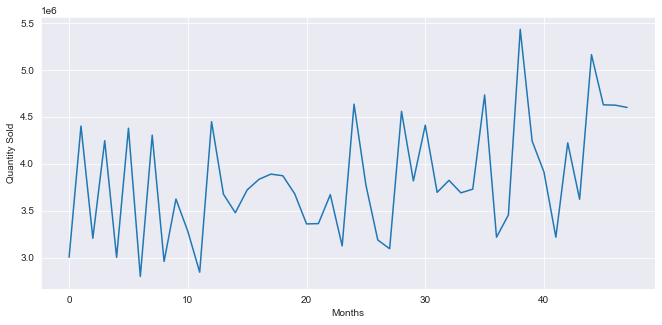

In [4]:
plt.figure(figsize=(11,5))
plt.xlabel('Months')
plt.ylabel('Quantity Sold')
plt.plot(wsb_df['Sale Quantity']);

In [5]:
wsb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Month                  48 non-null     int64
 1   Sale Quantity          48 non-null     int64
 2   Promotion Expenses     48 non-null     int64
 3   Competition Promotion  48 non-null     int64
dtypes: int64(4)
memory usage: 1.6 KB


## ***Forecasting Using Moving Average***
Moving Average is one of the simplest forecasting techniques which ***forecasts the future value of a time-series data using average (or weighted average) of past N observations.***<br>
**Forecasted value for time t+1 using simple moving average is:**
$$F_{t+1} = \frac{1}{N}\sum_{k = t+1-N}^{t}Y_k$$

Pandas has a function *rolling()* which can be used with an aggregate function like *mean()* for calculating moving average for a time window. For example, to calculate 12 month’s moving average using last  12 months’ data starting from last month (previous period), *rolling()* will take a parameter window,  which is set to 12 to indicate moving average of 12-months data, and then use Pandas’ *shift()* function,  which takes parameter 1 to specify that the 12-months data should start from last month. *shift(1)* means  calculating moving average for the specified window period starting from previous observation (in this  case last month).

In [6]:
wsb_df['mavg_12'] = wsb_df['Sale Quantity'].rolling(window = 12).mean().shift(1)

In [7]:
# to display upto 2 decimal place
pd.set_option('display.float_format', lambda x: '%.2f' %x)

wsb_df[['Sale Quantity', 'mavg_12']][36:]

,Sale Quantity,mavg_12
36,3216483,3928410.33
37,3453239,3810280.00
38,5431651,3783643.33
39,4241851,3970688.42
40,3909887,4066369.08
41,3216438,4012412.75
42,4222005,3962369.58
43,3621034,3946629.42
44,5162201,3940489.50
45,4627177,4052117.17


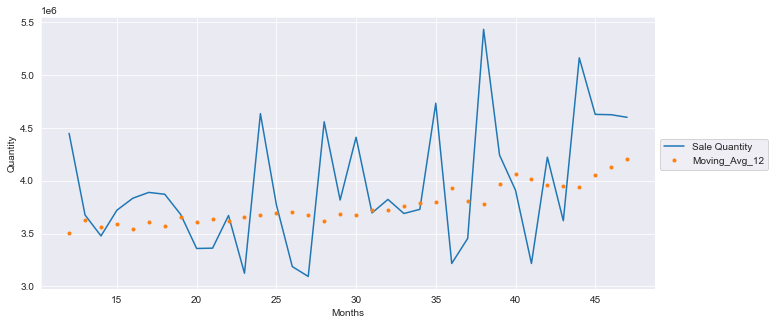

In [8]:
plt.figure(figsize=(11,5))
plt.xlabel("Months")
plt.ylabel("Quantity")

p1 = plt.plot(wsb_df['Sale Quantity'][12:], label='Sale Quantity')
p2 = plt.plot(wsb_df['mavg_12'][12:], '.', label='Moving_Avg_12')

plt.legend(bbox_to_anchor = (1.0, 0.57));

# As observed, increasing trend in sales quantity over the months.

## ***Calculating Forecasting Accuracy***
**Root mean square error (RMSE) and mean absolute percentage error (MAPE)** are the two most popular  accuracy measures of forecasting.

### ***Mean Absolute Percentage Error(MAPE)***
- **It assumes that the validation data has $n$ observations and forecasting is carried out on these $n$ observations.**

$$MAPE = \frac{1}{n}\sum_{t=1}^{n}\frac{|Y_t - F_t|}{Y_t}\times100%$$

- ***Since **MAPE** is dimensionless, it can be used for comaparing diff. models with varying scales.***

### ***Root Mean Square Error(RMSE)***
- **RMSE is calculated over the validation set.**

$$RMSE = \sqrt{\frac{1}{n}\sum_{t=1}^{n}(Y_t - F_t)^2}$$

- **Lower RMSE implies better prediction.** However it depends on the scale of the time-series data.

In [44]:
# MAPE
def get_mape(actual, predicted):
    y_true, y_pred = np.array(actual), np.array(predicted)
    return np.round(np.mean(np.abs((y_true - y_pred)/y_true)*100), 2)

In [45]:
# MAPE
get_mape(wsb_df['Sale Quantity'][36:].values,
        wsb_df['mavg_12'][36:].values)

14.04

In [46]:
# RMSE

from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(wsb_df['Sale Quantity'][36:].values,
        wsb_df['mavg_12'][36:].values))

734725.8359239782

## ***2. <u>Exponential Smoothing</u>***

- One of the drawbacks of the simple moving average technique is that it gives equal weight to all the previous observations used in forecasting the future value. 
- **Exponential smoothing technique (also known as simple exponential smoothing; SES) assigns differential weights to past observations.**

$$F_{t+1} = \alpha Y_t + (1 - \alpha)F_t$$

$\alpha$ is called the **smoothing constant**, and its value lies between 0 and 1.<br>
$F_{t+1}$ is the forecasted value  at time t+1 using actual value $Y_t$ at time t and<br>
forecasted values $F_t$ of time t.<br>

But the model applies differential weights to both the inputs using smoothing constant $\alpha$.

The *ewm()* method in Pandas provides the features for computing the exponential moving average  taking alpha as a parameter.

In [12]:
wsb_df['ewm'] = wsb_df['Sale Quantity'].ewm(alpha = 0.2).mean()

In [13]:
pd.options.display.float_format = '{:.2f}'.format

wsb_df[36:]

,Month,Sale Quantity,Promotion Expenses,Competition Promotion,mavg_12,ewm
36,37,3216483,121,1,3928410.33,3828234.64
37,38,3453239,128,0,3810280.00,3753219.93
38,39,5431651,170,0,3783643.33,4088961.93
39,40,4241851,160,0,3970688.42,4119543.81
40,41,3909887,151,1,4066369.08,4077607.99
41,42,3216438,120,1,4012412.75,3905359.34
42,43,4222005,152,0,3962369.58,3968692.78
43,44,3621034,125,0,3946629.42,3899157.24
44,45,5162201,170,0,3940489.50,4151776.99
45,46,4627177,160,0,4052117.17,4246860.31


In [14]:
get_mape(wsb_df['Sale Quantity'][36:].values,
        wsb_df['ewm'][36:].values)

# So, forecasting using exponential smoothing has about 11.15% error (MAPE) from the actual values. It  is an improvement compared to the simple moving average model.

11.15

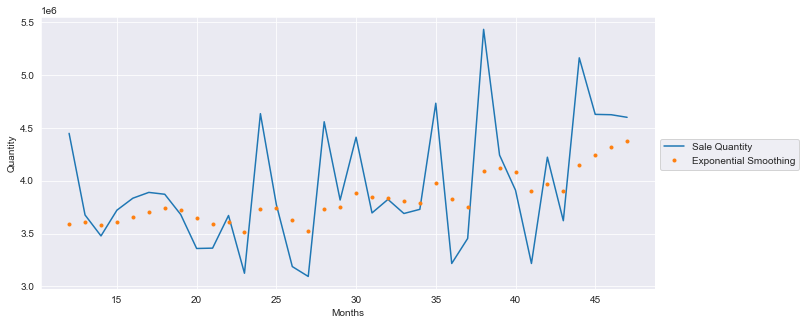

In [15]:
plt.figure(figsize=(11,5))
plt.xlabel("Months")
plt.ylabel("Quantity")

p1 = plt.plot(wsb_df['Sale Quantity'][12:], label='Sale Quantity')
p2 = plt.plot(wsb_df['ewm'][12:], '.', label='Exponential Smoothing')

plt.legend(bbox_to_anchor = (1.0, 0.57));

# As observed, increasing trend in sales quantity over the months.
# 

**Moving average and simple exponential smoothing (SES) assume a  fairly steady time-series data with no significant trend, seasonal or cyclical components, that is, the data  is stationary. However, many dataset will have trend and seasonality.**

## **Decomposing Time Series**
- **The time-series data can be modelled as addition or product of trend, seasonality, cyclical, and irregular  components.**<br> 
The additive time-series model is given by $$Y_t = T_t + S_t + C_t + I_t$$  The additive models assume that the seasonal and cyclical components are independent of the trend  component. Additive models are not very common, since in many cases the seasonal component may  not be independent of the trend.  
- The multiplicative time-series model is given by  $$Y_t = T_t \times S_t \times Ct \times I_t$$ Multiplicative models are more common and are a better fit for many datasets.

- In many cases, while building a forecasting model, only trend and seasonality components are  used. To estimate the cyclical component, we will need a large dataset. For example, typical period of  business cycles is about 58 months as per Investopedia (Anon, 2018). So, to understand the effect of  cyclic component we will need observations spanning more than 10 years. Most of the times, data for  such a long duration is not available.

For decomposing a time-series data, we can use following libraries:
   1. *statsmodel.tsa*
   2. *seasonal_decompose()* in *statsmodel.tsa.seasonal* decomposes a time-series into trend, seasonal, and residuals.<br>It takes frequency parameters; for e.g.: the frequency is 12 for monthly data.

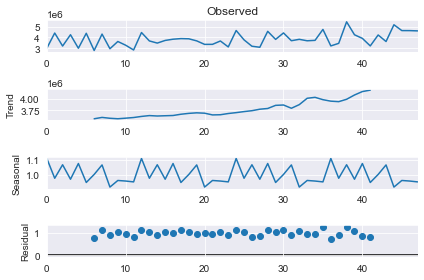

In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose

ts_decompose = seasonal_decompose(np.array(wsb_df['Sale Quantity']),
                                  model = 'multiplicative',
                                  period = 12) # freq = 12, 'freq' changed to 'period'.

ts_plot = ts_decompose.plot();
# Sales quantity in wsb-df has trend, which is increasing over a period. Also it has seasonality and  seasonality index varies from 0.9 to 1.1 over the trend

In [22]:
# To capture the seasonal and trend components after time-series decomposition

wsb_df['seasonal'] = ts_decompose.seasonal
wsb_df['trend'] = ts_decompose.trend

### 3. **<u>AUTO-REGRESSIVE INTEGRATED MOVING AVERAGE(ARIMA) MODELS</u>**

- Auto-regressive (AR) and moving average (MA) models are popular models that are frequently used for  forecasting.<br> 

- ***AR and MA models are combined to create models such as auto-regressive moving average (ARMA) and auto-regressive integrated moving average (ARIMA) models.***<br>

- *ARMA models are  basically regression models;* ***auto-regression simply means regression of a variable on itself measured at  different time periods.***

### ***$\rightarrow$ Auto-Regressive(AR) Models***
- **Auto-Regression is a regression of a variable on itself measured at diff. time points.**<br>*Auto-regressive model with lag = 1,* **AR(1)**, *is given by* 
$$Y_{t+1} = \mu + \beta Y_t + \epsilon_{t+1}$$

- ***Above eq. can be generalized to include p lags on the right-hand side and is called a*** **AR(p) model.**
$$Y_{t+1} - \mu = \beta (Y_t - \mu) + \epsilon_{t+1}$$

   - $\epsilon_{t+1}$ - **is a sequence of uncorrelated residuals assumed to follow Normal Distribution with mean$(\mu)$ = 0 & contant Standard Deviation.**
   - $(Y_t - \mu)$ - ***can be interpreted as a deviation from mean value $\mu$; known as*** **<u>mean centered series</u>.**
   <br><br>
- One of the important tasks in using the AR model in forecasting is model identification,  which is, identifying the value of ***p (the number of lags).*** One of the standard approaches used for model  identification is using ***<u>auto-correlation function (ACF) and partial auto-correlation function (PACF)</u>.***


### ***$\rightarrow$ ACF (Auto-Correlation Function)***
- ***Auto-correlation of lag $k$ is the correlation b/w $Y_t$ and $Y_{t-k}$ measured at different $k$ values*** (e.g., $Y_t$ & $Y_{t-1}$ or $Y_t$ & $Y_{t-2}$).
- A plot of auto-correlation for different values of $k$ is called **auto-correlation function (ACF)** or **correlogram**<br>

    *statsmodels.graphics.tsaplots.plot_acf*   plots the auto-corr. plot.
    
### ***$\rightarrow$ PACF (Partial Auto-Correlation Function)***
- ***Partial auto-correlation of lag $k$ is the correlation between $Y_t$ and $Y_{t-k}$ when the influence of all intermediate values $(Y_{t-1}, Y_{t-2},\cdots, Y_{t-k+1})$ is removed*** (**partial out**) ***from both $Y_t$ and $Y_{t-k}$.*** 
- A plot of partial  auto-correlation for different values of $k$ is called **partial auto-correlation function (PACF).**  

    *statsmodels.graphics.tsaplots.plot_pacf* plots the partial auto-correlation plot.

- **ACF plot: it is merely a bar chart of the coefficients of correlation between a time series and lags of itself.**

- **The PACF plot is a plot of the partial correlation coefficients between the series and lags of itself.**

- **A “lag” is a fixed amount of passing time, denoted by $k$.**

**Example to apply the AR model**

In [35]:
vimana_df = pd.read_csv(os.getcwd()+'/Data/vimana.csv')
vimana_df.head()

,Month,demand
0,1,457
1,2,439
2,3,404
3,4,392
4,5,403


In [36]:
vimana_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Month   37 non-null     int64
 1   demand  37 non-null     int64
dtypes: int64(2)
memory usage: 720.0 bytes


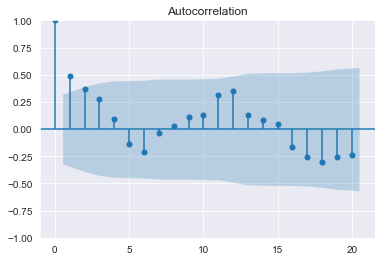

In [43]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Show auto-correlation upto lag 20
acf_plot = plot_acf(vimana_df.demand, lags=20)

- **In above plot, the shaded area represents the upper and lower bounds for critical values, where the null  hypothesis cannot be rejected (auto-correlation value is 0).**

- **So, as can be seen above, null  hypothesis is rejected only for lag = 1 (i e., auto-correlation is statistically significant for lag 1).**

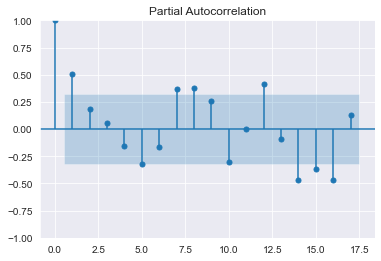

In [48]:
pacf_plot = plot_pacf(vimana_df.demand, lags=17)

- **In above plot, the shaded area represents the upper and lower bounds for critical values, where the null  hypothesis cannot be rejected.**

- **So, for lag = 1 the partial auto-correlation is significant.** 

- **To select the appropriate p in the AR model, the following thumb rule can be used:**  
     1. ***The partial auto-correlation is significant for first p-values (first p lags) and cuts off to zero.***  
     2. ***The ACF decreases exponentially. (Signs of stationarity)***  
    
    
**In the above case, based on ACF and PACF plots, AR with lag 1, AR(1), can be used.**

### ***$\rightarrow$ Buliding AR Model***
The *statsmodels.tsa.arima_model.ARIMA* can be used to build AR model.

It takes the following two  parameters:  
   1. *endog*: list of values – ***It is the endogenous variable of the time series.***  
   2. *order*: The ***(p, d, q)*** – **ARIMA** model parameters.<br> ***Order of AR is given by the value p,<br> the order  of integration is d,<br> and the order of MA is given by q.***

*We will set d and q to 0 and use p = 1 for AR(1) model, and we will use only 30 months of data for building  the model and forecast the next six months for measuring accuracy.*

In [56]:
# from statsmodels.tsa.arima_model import ARIMA - this has been replaced with the below
from statsmodels.tsa.arima.model import ARIMA

In [57]:
# vimana_df.demand[:30].astype(np.float64).as_matrix() --> .as_matrix() is removed, instead us .to_numpy()

arima = ARIMA(vimana_df.demand[:30].astype(np.float64).to_numpy(),
              order = (1,0,0))

ar_model = arima.fit()

In [59]:
ar_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   30
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -182.765
Date:                Sun, 28 Aug 2022   AIC                            371.530
Time:                        12:57:34   BIC                            375.734
Sample:                             0   HQIC                           372.875
                                 - 30                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        513.4426     43.815     11.718      0.000     427.567     599.318
ar.L1          0.4726      0.181      2.617      0.009       0.119       0.827
sigma2      1.136e+04   3299.003      3.444      0.001    4896.110    1.78e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.55   Jarque-Bera (JB):                 1.72
Prob(Q):                              0.46   Prob(JB):                         0.42
Heteroskedasticity (H):               2.72   Skew:                             0.59
Prob(H) (two-sided):                  0.13   Kurtosis:                         2.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**The model summary indicates the AR with lag 1 is significant variables in the model. The corresponding  p-value is less than 0.05 (0.009).**

### ***Forecast & Measure Accuracy***

In [60]:
# forecast the demand for the months 31 to 37. The index will be (month_index - 1)
forecast_31_37 = ar_model.predict(30, 36)
forecast_31_37

array([480.15274658, 497.71045018, 506.00789745, 509.92911817,
       511.78221484, 512.65795419, 513.07181248])

In [61]:
get_mape(vimana_df.demand[30:],
        forecast_31_37)

# the MAPE of the AR model with lag 1 is 19.12

19.12

### ***$\rightarrow$ Moving Average(MA) Processes***

- ***MA processes are regression models in which the past residuals are used for forecasting future values of the time-series data.***
     - *A moving average process of lag 1 can be written as -*
         $$Y_{t+1} = \alpha_1 \epsilon_t + \epsilon_{t+1}$$         
- *The above model can be generalized to q lags.*
- *The value of q(# of lags) can be identified as follow -*
    1. ***Auto-correlation value is significant for first q lags and cuts off to zero***
    2. ***The PACF decreases exponentially.***

In [79]:
arima = ARIMA(vimana_df.demand[:30].astype(np.float64).to_numpy(),
              order = (0,0,1))

ma_model = arima.fit()

ma_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   30
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -184.297
Date:                Sun, 28 Aug 2022   AIC                            374.595
Time:                        13:42:39   BIC                            378.799
Sample:                             0   HQIC                           375.940
                                 - 30                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        517.0213     31.024     16.665      0.000     456.215     577.827
ma.L1          0.3173      0.224      1.414      0.157      -0.122       0.757
sigma2      1.265e+04   4209.483      3.004      0.003    4395.561    2.09e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.41   Jarque-Bera (JB):                 2.21
Prob(Q):                              0.52   Prob(JB):                         0.33
Heteroskedasticity (H):               2.25   Skew:                             0.66
Prob(H) (two-sided):                  0.22   Kurtosis:                         2.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [72]:
ma_model.pvalues

# p-value is greater than 0.05, the moving average model with lag 1 might not be statistically significant

array([2.34623856e-62, 1.57283079e-01, 2.66307891e-03])

In [66]:
# Measuring Accuracy
forecast_31_37 = ma_model.predict(30, 36)

get_mape(vimana_df.demand[30:],
        forecast_31_37)

# the MAPE of the AR model with lag 1 is 17.78

17.78

### ***$\rightarrow$ ARMA Model***

- **Auto-regressive moving average (ARMA)** ***is a combination auto-regressive and moving average process.*** 

- **ARMA(p, q) process combines AR(p) and MA(q) processes.**

- *The values of p and q in an ARMA process can be identified using the following thumb rules:*  
    1. ***Auto-correlation values are significant for first q values (first q lags) and cuts off to zero.***
    
    2. ***Partial auto-correlation values are significant for first p values and cuts off to zero.***  
    
Based on the ACF and PACF plots in the previous section, we will develop ARMA(1, 1) model

In [80]:
arima = ARIMA(vimana_df.demand[:30].astype(np.float64).to_numpy(),
              order=(1,0,1))

arma_model = arima.fit()

arma_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   30
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -181.846
Date:                Sun, 28 Aug 2022   AIC                            371.692
Time:                        13:46:14   BIC                            377.296
Sample:                             0   HQIC                           373.485
                                 - 30                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        508.3844     59.146      8.595      0.000     392.461     624.308
ar.L1          0.7421      0.316      2.348      0.019       0.123       1.362
ma.L1         -0.3395      0.539     -0.629      0.529      -1.397       0.718
sigma2      1.065e+04   3040.079      3.505      0.000    4696.418    1.66e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):                 2.46
Prob(Q):                              0.72   Prob(JB):                         0.29
Heteroskedasticity (H):               3.07   Skew:                             0.67
Prob(H) (two-sided):                  0.09   Kurtosis:                         3.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [81]:
# The model summary indicates that moving average with lag 1 is not significant (p-value is more than  0.05), when both auto regressive with lag1 is also used in the model.


# Measuring Accuracy
forecast_31_37 = arma_model.predict(30, 36)

get_mape(vimana_df.demand[30:],
        forecast_31_37)

# the MAPE of the ARMA model with lag 1 is 20.27.

# Since MA lag is not significant, we will use AR(1) model.

20.27

## ***$\rightarrow$ ARIMA Model***

- **<u>ARMA models can be used only when the time-series data is stationary</u>.** 

- **<u>ARIMA models are used when  the time-series data is non-stationary</u>.** 

- **<u>Time-series data is called stationary if the mean, variance, and covariance are constant over time</u>.**

- *ARIMA model was proposed by Box and Jenkins (1970) and thus  is also known as Box−Jenkins methodology.* 

- **ARIMA has the following three components and is represented as ARIMA $(p, d, q)$:**
    1. ***AR component with p lags AR$(p)$.***  
    
    2. ***Integration component $(d)$.*** 
    
    3. ***MA with q lags, MA$(q)$.***

- **The main objective of the Integration Component is to convert a non-stationary time-series process to a stationary process so that the AR and MA processes can be used for forecasting. <br>When the data is non-stationary, the ACF will not cut-off to zero quickly; rather ACF may show a very slow decline.**  

#### ***$\rightarrow$ What is Stationary Data?***  
- *Time-series data should satisfy the following conditions to be stationary:*  
    1. ***The mean values of $Y_t$ at different values of $t$ are constant.***
    
    2. ***The variances of $Y_t$ at different time periods are constant (Homoscedasticity).***
    
    3. ***The covariance of $Y_t$ and $Y_{t-k}$ for different lags depend only on $k$ and not on time $t$.***

In [82]:
# Daily demand for a product in a store for the past 115 days is provided in store.xls. Develop  an appropriate ARIMA model that can be used for forecasting demand for Omelette.

store_df = pd.read_excel(os.getcwd()+'/Data/store.xls')
store_df.head()

,Date,demand
0,2014-10-01,15
1,2014-10-02,7
2,2014-10-03,8
3,2014-10-04,10
4,2014-10-05,13


In [83]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    115 non-null    datetime64[ns]
 1   demand  115 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.9 KB


In [85]:
# Creating a DateTime index will make sure that the data is ordered by date and time.
store_df.set_index(pd.to_datetime(store_df.Date), inplace=True)

store_df.drop('Date', axis=1, inplace=True)

store_df[-5:]

,demand
Date,
2015-01-19,18
2015-01-20,22
2015-01-21,22
2015-01-22,21
2015-01-23,17


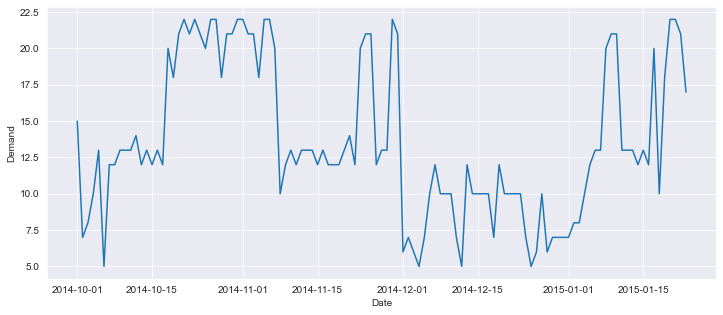

In [87]:
plt.figure(figsize=(12,5))
plt.xlabel('Date')
plt.ylabel('Demand')
plt.plot(store_df.demand);

# Graph shows the trendd of demand for omelette over dates. It is not very apperant from the trend if the series is stationary or not. 

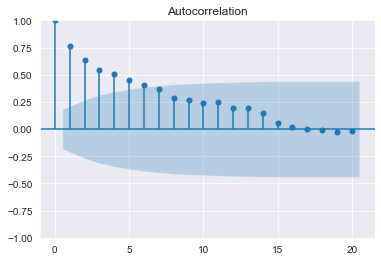

In [88]:
acf_plot = plot_acf(store_df.demand, lags=20)

# Figure shows the decline of auto-correlations for different lags indicates that the series is not stationary.

### ***$\rightarrow$ Dicky-Fuller Test***
- **To find out if a time-series data is stationary or not, Dicky-Fuller test can be conducted.**

- ***Dicky-Fuller test checks weather the $\beta$ in the Eq.: $$Y_{t+1} = \mu + \beta Y_t + \epsilon_{t+1}$$ is equal to 1 or less than equal to 1.<br> It is Hypothesis Test in which null & alternate hypothesis is given as 
$$H_o : \beta = 1 (\text{the time-series is not-stationary})$$ 
$$H_A : \beta < 1 (\text{the time-series is stationary})$$*** 
<br>*statsmodels.tsa.stattools.adfuller* is a Dicky-Fuller test<br> and returns test statistics & $p-value$ for the test of null hypothesis.<br>***If $p-value$ $< 0.05$, the time-series is stationary.*** 

In [89]:
from statsmodels.tsa.stattools import adfuller

In [92]:
def adfuller_test(ts):
    adfuller_result = adfuller(ts, autolag=None)
    adfuller_out = pd.Series(adfuller_result[0:4],
                            index=['Test Statistic',
                                   'p-value',
                                   'Lag Used',
                                   'Number of Observations Used'])
    print(adfuller_out)

In [93]:
adfuller_test(store_df.demand)

# The p-value (>0.05) indicates that we cannot reject the null hypothesis and hence, the series is not stationary.

Test Statistic                 -1.65
p-value                         0.46
Lag Used                       13.00
Number of Observations Used   101.00
dtype: float64


### ***$\rightarrow$ Differencing***  

- ***Differencing the original time series is an usual approach for converting the non-stationary process into a stationary process (called difference stationarity).*** 

- For example, the first difference (d = 1) is the  difference between consecutive values of the time series $(Y_t)$. That is, the first difference is given by $$Δ Y_t = Y_t - Y_{t-1}$$


First difference between consecutive $Y_t$ values can be computed by subtracting the previous day’s demand from that day’s demand. We can use *shift()* function in Pandas to shift the values before subtracting.

In [94]:
store_df['demand_diff'] = store_df.demand - store_df.demand.shift(1)
store_df.head()

,demand,demand_diff
Date,,
2014-10-01,15,NaN
2014-10-02,7,-8.00
2014-10-03,8,1.00
2014-10-04,10,2.00
2014-10-05,13,3.00


In [96]:
# Droppinf the nan value
store_diff_df = store_df.dropna()
store_diff_df.head()

,demand,demand_diff
Date,,
2014-10-02,7,-8.00
2014-10-03,8,1.00
2014-10-04,10,2.00
2014-10-05,13,3.00
2014-10-06,5,-8.00


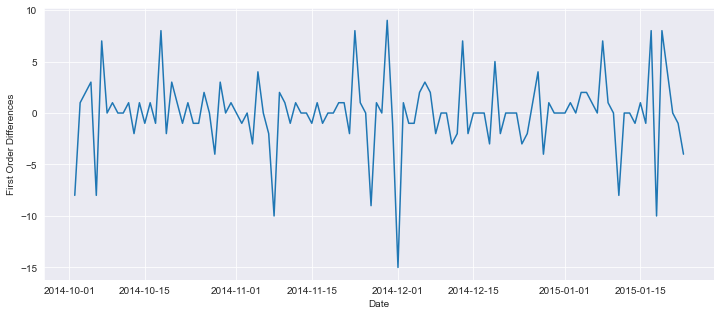

In [97]:
plt.figure(figsize=(12,5))
plt.xlabel('Date')
plt.ylabel('First Order Differences')
plt.plot(store_diff_df.demand_diff);

# Graph indicates the trend of first-order of differences for demand over dates. Again, it is not very apparent from the trend if the series is stationary or not. We will need to plot the ACF plot to verify

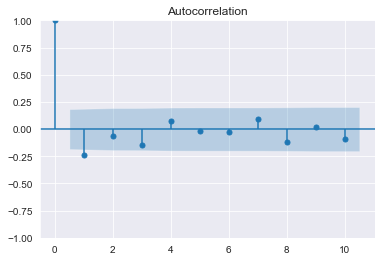

In [99]:
acf_plot = plot_acf(store_diff_df.demand_diff, lags=10)

# The ACF plot shows no sign of slow reduction in autocorrelation over lags. It immediately  cuts off to zero.

In [100]:
# We can build the model with first 100 observations as training set and subsequent observations as test set.

store_train = store_df[0:100]
store_test = store_df[100:]

In [102]:
arima = ARIMA(store_train.demand.astype(np.float64).to_numpy(), order = (1,1,1))

arima_model = arima.fit()

arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -256.910
Date:                Sun, 28 Aug 2022   AIC                            519.821
Time:                        15:04:08   BIC                            527.606
Sample:                             0   HQIC                           522.971
                                - 100                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4091      0.311      1.315      0.189      -0.201       1.019
ma.L1         -0.7179      0.236     -3.039      0.002      -1.181      -0.255
sigma2        10.4865      1.026     10.223      0.000       8.476      12.497
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                75.18
Prob(Q):                              0.81   Prob(JB):                         0.00
Heteroskedasticity (H):               0.76   Skew:                            -0.79
Prob(H) (two-sided):                  0.44   Kurtosis:                         6.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**ARIMA model is a regression model and thus has to satisfy all the assumptions of regression. The residuals  should be white noise and not correlated. This can be observed by using ACF and PACF plots of the  residuals. The model residuals are given by *arima_model.resid* variable.**


***Both plots do not show any auto-correlation of residuals. So, the model can be  assumed to be valid.***

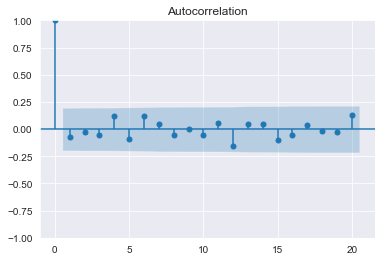

In [103]:
acf_plot = plot_acf(arima_model.resid, lags=20)

# Residuals follow white noise, whixh means our model is statistcally significant.

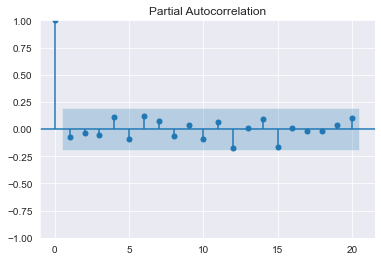

In [104]:
pacf_plot = plot_pacf(arima_model.resid, lags=20)

- ***An autocorrelation plot shows the correlation between a time series with itself, lagged by a specific number of periods.***

- ***Autocorrelation plots also include a shaded area that represents confidence intervals. Anything inside the shaded area means that the correlation at that point isn’t statistically significant.*** 

- ***Autocorrelation at lag 0 will have a value of 1, since the correlation is calculated between two identical time series***

### ***What is White Noise in time-series?***
**Link: https://machinelearningmastery.com/white-noise-time-series-python/#:~:text=What%20is%20a%20White%20Noise,other%20values%20in%20the%20series**

**Link: https://towardsdatascience.com/time-series-from-scratch-white-noise-and-random-walk-5c96270514d3**


- A time series is white noise if the variables are independent and identically distributed with a mean of zero.<br>This means that all variables have the same variance and each value has a zero correlation with all other values in the series.

- If the variables in the series are drawn from a Gaussian distribution, the series is called Gaussian white noise.

- Why Does it Matter?
   - White noise is an important concept in time series analysis and forecasting.<br>It is important for two main reasons:
        - Predictability: If your time series is white noise, then, by definition, it is random. You cannot reasonably model it and make predictions.

        - Model Diagnostics: The series of errors from a time series forecast model should ideally be white noise. <br>Model Diagnostics is an important area of time series forecasting.

- Time series data are expected to contain some white noise component on top of the signal generated by the underlying process.<br>For example: $y(t) = signal(t) + noise(t)$
     - Once predictions have been made by a time series forecast model, they can be collected and analyzed. The series of forecast errors should ideally be white noise.
     - When forecast errors are white noise, it means that all of the signal information in the time series has been harnessed by the model in order to make predictions. All that is left is the random fluctuations that cannot be modeled.
     - A sign that model predictions are not white noise is an indication that further improvements to the forecast model may be possible.<br><br>


- Is your Time Series White Noise?
     - Your time series is probably NOT white noise if one or more of the following conditions are true:
         - Is the mean/level non-zero?
         - Does the mean/level change over time?
         - Does the variance change over time?
         - Do values correlate with lag values?

### ***Forecast & Measure Accuracy***

***The *forecast()* method takes the number of future periods (steps) for predicting values and returns the  predicted values along with standard error and confidence interval of the predictions.***

In [119]:
# store_predict, stderr, ci = arima_model.forecast(steps = 15)
arima_model.forecast(steps = 15)

array([17.2507625 , 16.12611837, 15.66605465, 15.47785411, 15.40086599,
       15.36937208, 15.35648871, 15.35121845, 15.34906252, 15.34818058,
       15.3478198 , 15.34767221, 15.34761184, 15.34758714, 15.34757704])

In [115]:
store_predict = arima_model.forecast(steps = 15)
store_predict

array([17.2507625 , 16.12611837, 15.66605465, 15.47785411, 15.40086599,
       15.36937208, 15.35648871, 15.35121845, 15.34906252, 15.34818058,
       15.3478198 , 15.34767221, 15.34761184, 15.34758714, 15.34757704])

In [120]:
get_mape(store_df.demand[100:],
         store_predict)

# The ARIMA model with first-order differencing gives forecast accuracy of 24.12%.

24.12

### ***Conclusion***

1. ***Forecasting is carried out on a time-series data in which the dependent variable $Y_t$ is observed at  different time periods t.***  

2. ***Several techniques such as moving average, exponential smoothing, and auto-regressive models are  used for forecasting future value of $Y_t$.***  

3. ***The forecasting models are validated using accuracy measures such as RMSE and MAPE.***  

4. ***Auto-regressive (AR) models are regression-based models in which dependent variable is Yt and the  independent variables are $Y_{t-1}$, $Y_{t-2}$, etc.***  

5. ***AR models can be used only when the data is stationary.***  

6. ***Moving average (MA) models are regression models in which the independent variables are past error values.***  

7. ***Auto-regressive integrated moving average (ARIMA) has three components:***  
    a. ***Auto-regressive component with p lags − AR(p)***  
    b. ***Moving average component with q lags − MA(q)***  
    c. ***Integration which is differencing the original data to make it stationary (denoted by d).***  
    
8. ***One of the necessary conditions of acceptance of ARIMA model is that the residuals should follow White Noise.***  

9. ***In ARIMA, the model identification, that is, identifying the value of p in AR and q in MA, is achieved through auto-correlation function (ACF) and partial auto-correlation function (PACF).***  

10. ***The stationarity of time-series data can be checked using the Dickey−Fuller test.***

#### ***Reference: Pradhan, Manaranjan; U Dinesh Kumar. Machine Learning using Python. Kindle Edition.*** 